In [73]:
import pandas as pd
import numpy as np
import pickle
from gpt_few_shot_clf import MultiLabelFewShotGPTClassifier
from sklearn.model_selection import train_test_split
import ast
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import operator
from collections import Counter

In [5]:
df_test = pd.read_csv("./All_Incidents.csv")
df_test = df_test.replace(np.nan, '')
df_test

,Power plant,File Name,Cause of the event
0,South Texas,4981999007,This event was caused by degradation of the ma...
1,South Texas,4982000001,The cause of this event was:\n• Ineffective pr...
2,South Texas,4982000002,\nThe root cause for this event was a failure ...
3,South Texas,4982000003,The root cause for this event is workers' lack...
4,South Texas,4982000004,The root cause for this event was that special...
...,...,...,...
245,Davis-Besse,3462016008,The direct cause for the failure to properly a...
246,Davis-Besse,3462016009,\nThe direct cause of the generator lockout an...
247,Davis-Besse,3462017001,\nThe primary cause of the inadequate missile ...
248,Davis-Besse,3462017002,The direct cause of the damaged AFW Pump Turbi...


In [7]:
X = [sentence for sentence in df_test["Cause of the event"].tolist()]
len(X)

250

In [8]:
with open('clf_fewshot.pkl', 'rb') as model_file:
    clf_fewshot = pickle.load(model_file)

In [10]:
predictions_fewshot = clf_fewshot.predict(X)

 10%|████▎                                     | 26/250 [01:20<24:05,  6.45s/it]

Could not obtain the completion after 3 retries: `APIError :: The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID 219a307f580826896739679349706f33 in your email.) {
  "error": {
    "message": "The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID 219a307f580826896739679349706f33 in your email.)",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID 219a307f580826896739679349706f33 in your email.)', 'type': 'server_

 75%|█████████████████████████████▎         | 188/250 [16:49<1:39:32, 96.34s/it]

Could not obtain the completion after 3 retries: `APIError :: The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID 8099b59c91085b2560b4555d7dab5d8d in your email.) {
  "error": {
    "message": "The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID 8099b59c91085b2560b4555d7dab5d8d in your email.)",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID 8099b59c91085b2560b4555d7dab5d8d in your email.)', 'type': 'server_

 78%|███████████████████████████████▉         | 195/250 [17:13<11:58, 13.06s/it]

Could not obtain the completion after 3 retries: `APIError :: The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID f5cfca1caf334feacda20225099032eb in your email.) {
  "error": {
    "message": "The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID f5cfca1caf334feacda20225099032eb in your email.)",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID f5cfca1caf334feacda20225099032eb in your email.)', 'type': 'server_

100%|█████████████████████████████████████████| 250/250 [20:26<00:00,  4.91s/it]


In [24]:
for row in range(len(df_test)):
    print(df_test.iloc[row]['Cause of the event'])
    break

This event was caused by degradation of the makeup filter and cleanup filter charcoal due to aging (i.e., the expected decline in charcoal performance attributed to the physical age of the charcoal and the consumption of background level contaminants during normal system use and testing).


In [67]:
i = 0
columnNamesForResult = ["Power Plant", "Incident", "Predicted Labels"]

powerplants = []
incidents = []
predictedLabels = []

for row in range(len(df_test)):
    pred_labels = sorted(predictions_fewshot[i])
    predictedLabels.append(pred_labels)
    
    powerplant = df_test.iloc[row]['Power plant']
    powerplants.append(powerplant)
    
    paragraph = df_test.iloc[row]['Cause of the event']
    incidents.append(paragraph)
    
    i+=1
    
resultingDF = pd.DataFrame(columns=columnNamesForResult, data=
                           {"Power Plant": powerplants,
                            "Incident": incidents,
                            "Predicted Labels": predictedLabels})

In [68]:
resultingDF

,Power Plant,Incident,Predicted Labels
0,South Texas,This event was caused by degradation of the ma...,"[problem identification and resolution, work p..."
1,South Texas,The cause of this event was:\n• Ineffective pr...,"[leadership safety values and actions, problem..."
2,South Texas,\nThe root cause for this event was a failure ...,"[decision making, leadership safety values and..."
3,South Texas,The root cause for this event is workers' lack...,"[continuous learning, problem identification a..."
4,South Texas,The root cause for this event was that special...,"[decision making, problem identification and r..."
...,...,...,...
245,Davis-Besse,The direct cause for the failure to properly a...,"[leadership safety values and actions, persona..."
246,Davis-Besse,\nThe direct cause of the generator lockout an...,"[leadership safety values and actions, problem..."
247,Davis-Besse,\nThe primary cause of the inadequate missile ...,"[leadership safety values and actions, problem..."
248,Davis-Besse,The direct cause of the damaged AFW Pump Turbi...,"[continuous learning, problem identification a..."


In [69]:
drop_rows = []
for row in range(len(resultingDF)):
    if len(resultingDF.iloc[row]['Predicted Labels'][0]) == 1:
        drop_rows.append(row)
resultingDF.drop(drop_rows,axis=0,inplace=True)

In [70]:
drop_rows

[25, 187, 194]

In [71]:
resultingDF

,Power Plant,Incident,Predicted Labels
0,South Texas,This event was caused by degradation of the ma...,"[problem identification and resolution, work p..."
1,South Texas,The cause of this event was:\n• Ineffective pr...,"[leadership safety values and actions, problem..."
2,South Texas,\nThe root cause for this event was a failure ...,"[decision making, leadership safety values and..."
3,South Texas,The root cause for this event is workers' lack...,"[continuous learning, problem identification a..."
4,South Texas,The root cause for this event was that special...,"[decision making, problem identification and r..."
...,...,...,...
245,Davis-Besse,The direct cause for the failure to properly a...,"[leadership safety values and actions, persona..."
246,Davis-Besse,\nThe direct cause of the generator lockout an...,"[leadership safety values and actions, problem..."
247,Davis-Besse,\nThe primary cause of the inadequate missile ...,"[leadership safety values and actions, problem..."
248,Davis-Besse,The direct cause of the damaged AFW Pump Turbi...,"[continuous learning, problem identification a..."


In [72]:
resultingDF
resultingDF.to_csv("All_LERS.csv", index=False)

In [75]:
df_hist = pd.read_csv("All_LERS.csv")
df_hist

,Power Plant,Incident,Predicted Labels
0,South Texas,This event was caused by degradation of the ma...,"['problem identification and resolution', 'wor..."
1,South Texas,The cause of this event was:\n• Ineffective pr...,"['leadership safety values and actions', 'prob..."
2,South Texas,\nThe root cause for this event was a failure ...,"['decision making', 'leadership safety values ..."
3,South Texas,The root cause for this event is workers' lack...,"['continuous learning', 'problem identificatio..."
4,South Texas,The root cause for this event was that special...,"['decision making', 'problem identification an..."
...,...,...,...
242,Davis-Besse,The direct cause for the failure to properly a...,"['leadership safety values and actions', 'pers..."
243,Davis-Besse,\nThe direct cause of the generator lockout an...,"['leadership safety values and actions', 'prob..."
244,Davis-Besse,\nThe primary cause of the inadequate missile ...,"['leadership safety values and actions', 'prob..."
245,Davis-Besse,The direct cause of the damaged AFW Pump Turbi...,"['continuous learning', 'problem identificatio..."


In [76]:
# Flatten the data and count occurrences of each safety trait
traits_list = [ast.literal_eval(x) for x in df_hist["Predicted Labels"]]
all_traits = [trait for sublist in traits_list for trait in sublist]
trait_counts = Counter(all_traits)

In [77]:
#COUNTS OF OCCURRENCES
df_Counts = pd.DataFrame()
plants = ['Davis-Besse','South Texas','Diablo Canyon']
df_Counts['Power Plant'] = plants
df_Counts.set_index('Power Plant',inplace=True)

for plant in plants:
    plant_df = df_hist[df_hist['Power Plant'] == plant]
    traits_list = [ast.literal_eval(x) for x in plant_df["Predicted Labels"]]
    all_traits = [trait for sublist in traits_list for trait in sublist]
    item_counts = Counter(all_traits)
    for trait, count in item_counts.items():
        df_Counts.at[plant,trait] = int(count)
df_Counts

,continuous learning,problem identification and resolution,questioning attitude,work processes,decision making,effective safety communication,personal accountability,leadership safety values and actions,environment for raising concerns
Power Plant,,,,,,,,,
Davis-Besse,23.0,70.0,28.0,74.0,13.0,7.0,13.0,9.0,NaN
South Texas,18.0,84.0,14.0,81.0,16.0,7.0,12.0,15.0,2.0
Diablo Canyon,10.0,54.0,13.0,54.0,9.0,4.0,16.0,6.0,NaN


In [79]:
plant_counts = df_hist['Power Plant'].value_counts()
plant_counts

Power Plant
South Texas      103
Davis-Besse       78
Diablo Canyon     66
Name: count, dtype: int64

In [80]:
#PERCENTAGE OF OCCURRENCES
for plant in plant_counts.index:
    plant_df = df_hist[df_hist['Power Plant'] == plant]
    num_occurrences = len(plant_df)
    traits_list = [ast.literal_eval(x) for x in plant_df["Predicted Labels"]]
    all_traits = [trait for sublist in traits_list for trait in sublist]
    item_counts = Counter(all_traits)
    total_counts = sum(item_counts.values())
    
    # Calculate percentages and assign them to the DataFrame
    percentages = {trait: (count / num_occurrences) * 100 for trait, count in item_counts.items()}
    df_Counts.loc[plant] = percentages
df_Counts

,continuous learning,problem identification and resolution,questioning attitude,work processes,decision making,effective safety communication,personal accountability,leadership safety values and actions,environment for raising concerns
Power Plant,,,,,,,,,
Davis-Besse,29.487179,89.743590,35.897436,94.871795,16.666667,8.974359,16.666667,11.538462,NaN
South Texas,17.475728,81.553398,13.592233,78.640777,15.533981,6.796117,11.650485,14.563107,1.941748
Diablo Canyon,15.151515,81.818182,19.696970,81.818182,13.636364,6.060606,24.242424,9.090909,NaN


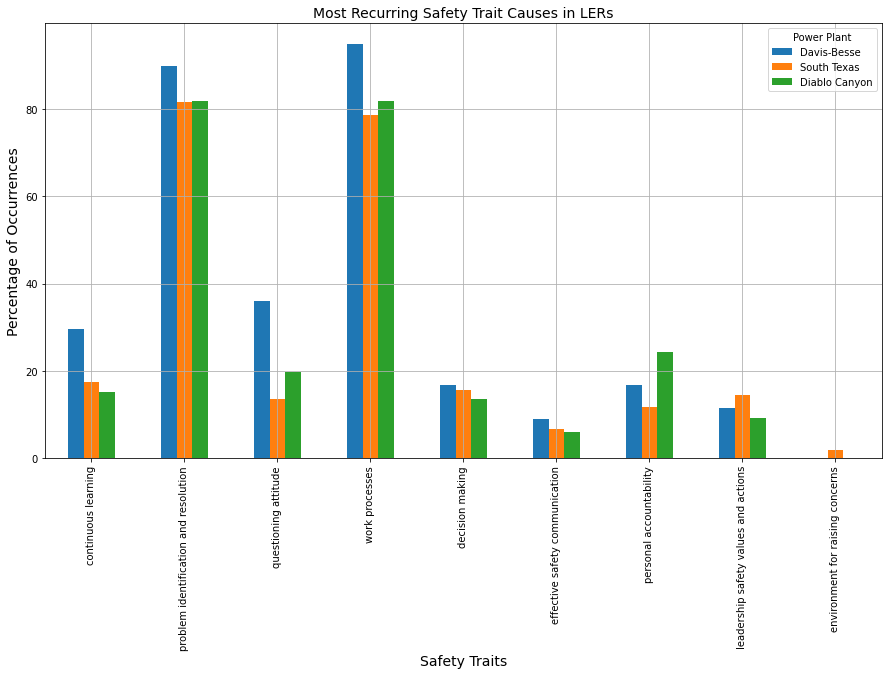

In [81]:
# Transpose the DataFrame
flipped_df = df_Counts.transpose()

# Plot a bar chart with percentages
fig, ax = plt.subplots(figsize=(15, 8))
flipped_df.plot(kind='bar', rot=90, grid=True, ax=ax)
plt.title('Most Recurring Safety Trait Causes in LERs',fontsize=14)
plt.xlabel('Safety Traits',fontsize=14)
plt.ylabel('Percentage of Occurrences',fontsize=14)
plt.show()